In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

### Opening MIP file

In [5]:
MIP_file = "./Run1_list.txt"

# The width of each column in the data text files
column_widths = [(0, 4), (4, 8), (8, 17), (17, 26), (26, 43), (43, 56), (56, 70)]

MIP_df = pd.read_fwf(MIP_file, colspecs=column_widths, skiprows=9, header=None, names=["Brd", "Ch", "LG","HG", "Tstamp_us", "TrgID", "NHits"])
MIP_df["Tstamp_us"] = MIP_df["Tstamp_us"].fillna(method="ffill")
MIP_df["TrgID"] = MIP_df["TrgID"].fillna(method="ffill")
MIP_df["NHits"] = MIP_df["NHits"].fillna(method="ffill")

In [6]:
# Number of CAEN units = 6, each has 64 channels
CAEN_numbers = np.arange(6)
channel_numbers = np.arange(64)

#### Don't yet have the pedestal information but we'll set up a placeheolder pedestal dataframe for now

In [7]:
pedestal_example = {}
for CAEN in CAEN_numbers:
    for channel in channel_numbers:
        column_name = f"{CAEN}-{channel}"
        HG_mean, HG_sigma = 0, 0
        LG_mean, LG_sigma = 0, 0
        channel_dict = {
            "HG":{"m":HG_mean, "s":HG_sigma},
            "LG":{"m":LG_mean, "s":LG_sigma}
        }
        pedestal_example[column_name] = channel_dict
pedestal_df = pd.DataFrame(pedestal_example)

In [8]:
pedestal_df

,0-0,0-1,0-2,0-3,0-4,0-5,0-6,0-7,0-8,0-9,...,5-54,5-55,5-56,5-57,5-58,5-59,5-60,5-61,5-62,5-63
HG,"{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}",...,"{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}"
LG,"{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}",...,"{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}","{'m': 0, 's': 0}"


In [9]:
# Can access the entries as df["CAEN#-Channel#"]["HG"/"LG"]["m"/"s"] 
# HG = High gain, LG = low gain
# m = mean, s = sigm
pedestal_df["1-1"]["HG"]["m"]

0

In [10]:
def plot_CAEN_MIPs(MIP_df, pedestal_df, CAEN_number, channel_numbers, gain_setting="HG"):
    num_columns, num_rows = 8, 8
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(30, 30), sharey=True, sharex=True)
    axes = axes.flatten()
    
    CAEN_mask = MIP_df["Brd"]==CAEN_number
    HG_MIPs = MIP_df[gain_setting][CAEN_mask]

    for channel in channel_numbers:
        channel_mask = MIP_df["Ch"][CAEN_mask]==channel
        HG_MIPs_for_channel = HG_MIPs[channel_mask]

        pedestal_mean = pedestal_df[f"{CAEN_number}-{channel}"][gain_setting]["m"]
        pedestal_sigma = pedestal_df[f"{CAEN_number}-{channel}"][gain_setting]["s"]
        counts, bin_edges = np.histogram(HG_MIPs_for_channel - pedestal_mean, bins=50)
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        errors = np.sqrt(counts)
        
        axes[channel].scatter(bin_centers, counts)
        axes[channel].set_title(f"CAEN {CAEN_number}, Ch {channel}")
        axes[channel].set_xlabel("ADCs")

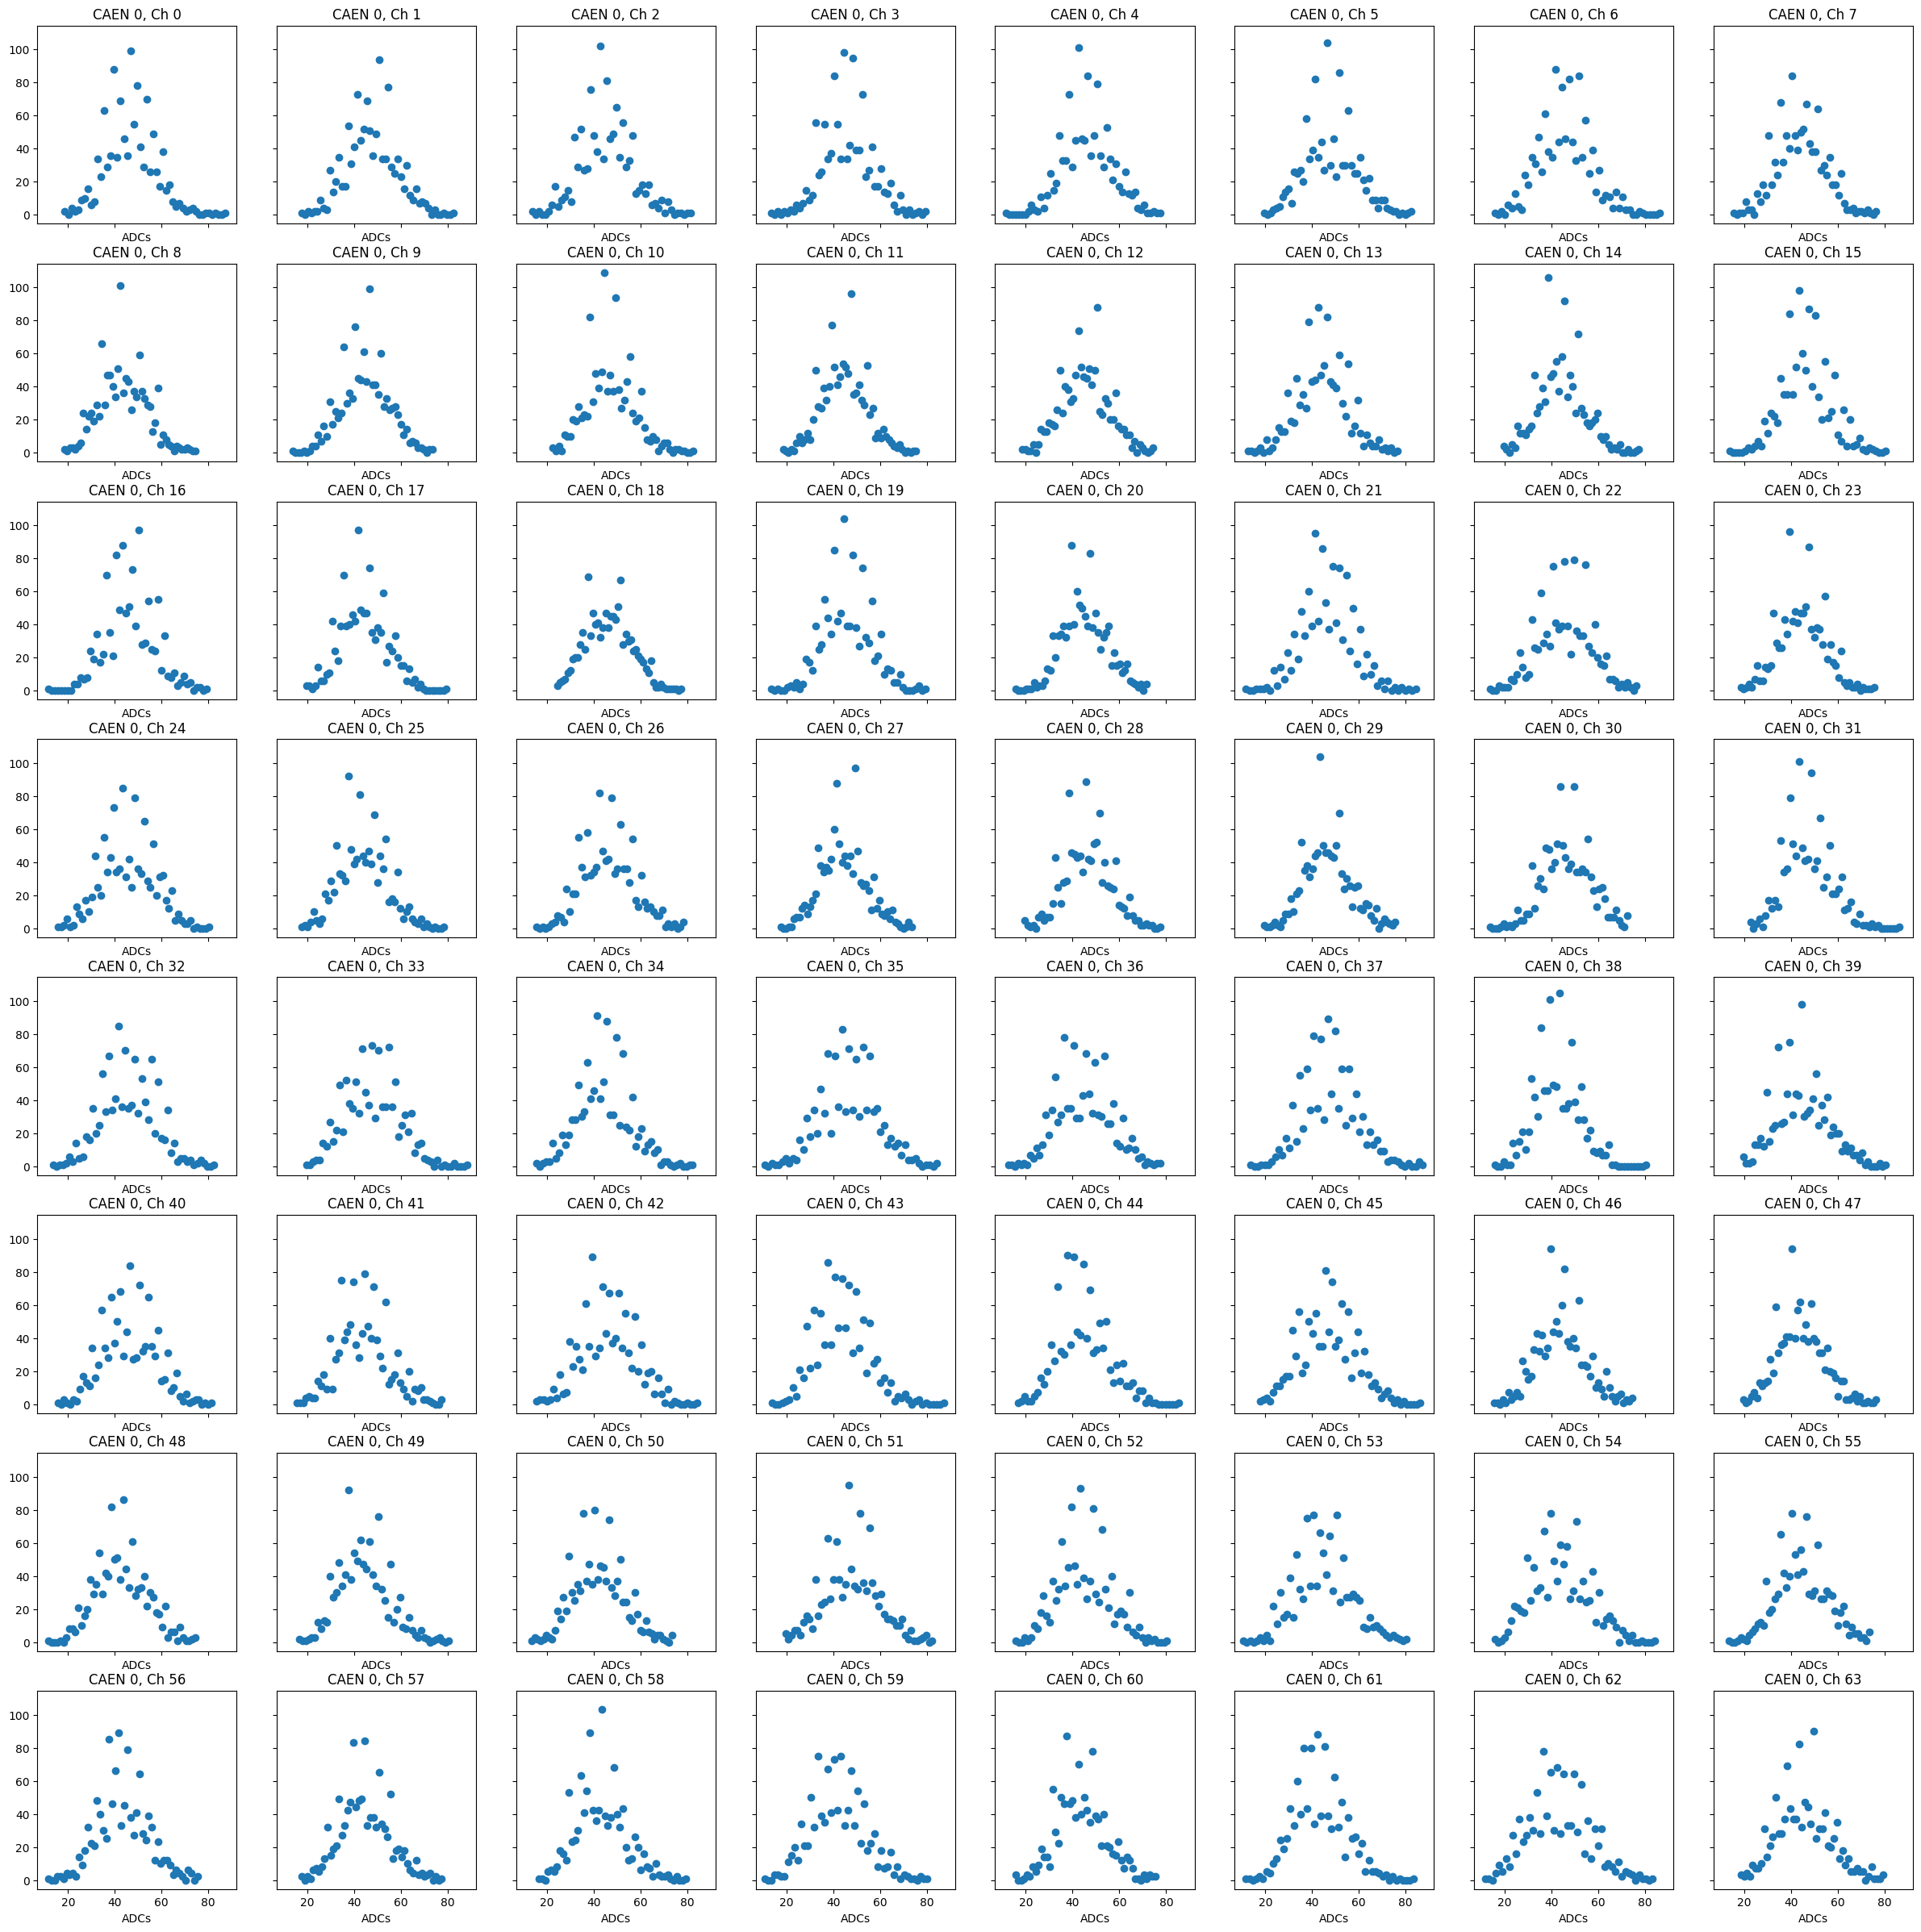

In [11]:
plot_CAEN_MIPs(MIP_df, pedestal_df, 0, channel_numbers)